In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# 定义高斯函数
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# 定义由5个高斯函数叠加的函数
def combined_gaussian(x, params):
    y = np.zeros_like(x)
    for i in range(5):
        amplitude = params[i*3]
        mean = params[i*3+1]
        stddev = params[i*3+2]
        y += gaussian(x, amplitude, mean, stddev)
    return y

# 定义目标函数，最小化原始PPG信号与拟合信号之间的差异
def objective_function(params, x, y):
    y_fit = combined_gaussian(x, params)
    return np.sum((y - y_fit) ** 2)

# 生成模拟的PPG信号
x = np.linspace(0, 200, 200)
# 假设这是你的原始PPG信号，这里用多个高斯波构造一个信号
ppg_signal = (gaussian(x, 1.0, 50, 10) + 
              gaussian(x, 0.8, 100, 15) + 
              gaussian(x, 0.6, 150, 10) +
              gaussian(x, 0.4, 175, 7) + 
              gaussian(x, 0.2, 190, 5))

# 初始参数猜测，每个高斯函数有三个参数（振幅、均值和标准差）
initial_params = [1, 50, 10, 0.8, 100, 15, 0.6, 150, 10, 0.4, 175, 7, 0.2, 190, 5]

# 使用SciPy的minimize函数来优化参数
result = minimize(objective_function, initial_params, args=(x, ppg_signal), method='L-BFGS-B')

# 获取拟合后的参数
fitted_params = result.x

# 生成拟合后的PPG信号
fitted_signal = combined_gaussian(x, fitted_params)

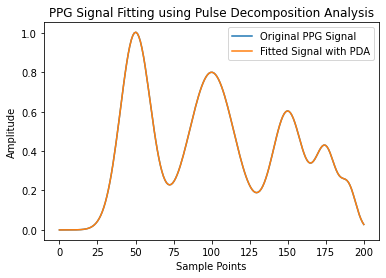

Fitted Parameters (Amplitude, Mean, Stddev for each Gaussian):
[  1.   50.   10.    0.8 100.   15.    0.6 150.   10.    0.4 175.    7.
   0.2 190.    5. ]


In [3]:
# 绘制原始信号与拟合信号
plt.plot(x, ppg_signal, label='Original PPG Signal')
plt.plot(x, fitted_signal, label='Fitted Signal with PDA')
plt.legend()
plt.xlabel('Sample Points')
plt.ylabel('Amplitude')
plt.title('PPG Signal Fitting using Pulse Decomposition Analysis')
plt.show()

# 输出拟合参数
print("Fitted Parameters (Amplitude, Mean, Stddev for each Gaussian):")
print(fitted_params)

In [4]:
# 生成随机PPG信号
def generate_random_ppg(num_points=200, num_gaussians=5):
    x = np.linspace(0, num_points, num_points)
    ppg_signal = np.zeros(num_points)
    
    for _ in range(num_gaussians):
        amplitude = np.random.uniform(0.2, 1.0)
        mean = np.random.uniform(0, num_points)
        stddev = np.random.uniform(5, 20)
        ppg_signal += gaussian(x, amplitude, mean, stddev)
    
    return x, ppg_signal

# 生成随机初始参数
def generate_random_initial_params(num_gaussians=5):
    initial_params = []
    for _ in range(num_gaussians):
        amplitude = np.random.uniform(0.2, 1.0)
        mean = np.random.uniform(0, 200)
        stddev = np.random.uniform(5, 20)
        initial_params.extend([amplitude, mean, stddev])
    return initial_params

# 生成随机PPG信号
x, random_ppg_signal = generate_random_ppg()

# 生成随机初始参数
random_initial_params = generate_random_initial_params()

# 使用随机生成的信号和初始参数进行拟合
result = minimize(objective_function, random_initial_params, args=(x, random_ppg_signal), method='L-BFGS-B')

# 获取拟合后的参数
fitted_params = result.x

# 生成拟合后的PPG信号
fitted_signal = combined_gaussian(x, fitted_params)

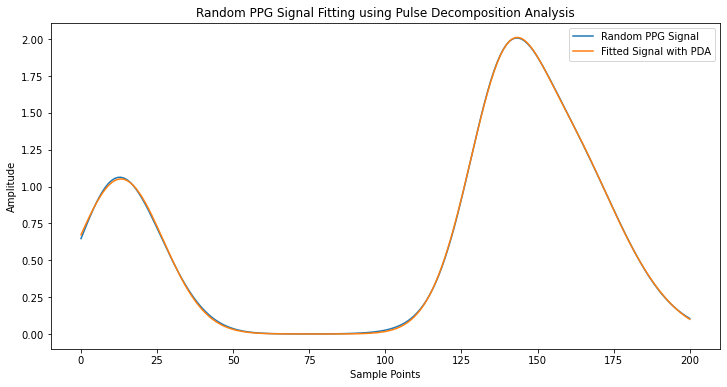

Random Initial Parameters:
 Gaussian  Amplitude      Mean       Stddev   
----------------------------------------------
    1        0.7512     163.8039     9.1520   
    2        0.4453      2.1689     19.4854   
    3        0.3694     166.5434    11.6746   
    4        0.5194     175.7080    12.4751   
    5        0.6200     135.1715    11.5937   

Fitted Parameters:
 Gaussian  Amplitude      Mean       Stddev   
----------------------------------------------
    1        0.5743     163.2657    10.7563   
    2        1.0518     13.1146     13.8773   
    3       -0.0259     165.2815    14.1145   
    4        0.4655     175.6437    13.8488   
    5        1.9093     141.2209    13.4169   


In [7]:
# 绘制原始随机信号与拟合信号
plt.figure(figsize=(12, 6))
plt.plot(x, random_ppg_signal, label='Random PPG Signal')
plt.plot(x, fitted_signal, label='Fitted Signal with PDA')
plt.legend()
plt.xlabel('Sample Points')
plt.ylabel('Amplitude')
plt.title('Random PPG Signal Fitting using Pulse Decomposition Analysis')
plt.show()

# 输出拟合参数
print("Random Initial Parameters:")
print(f"{'Gaussian':^10}{'Amplitude':^12}{'Mean':^12}{'Stddev':^12}")
print("-" * 46)
for i in range(0, len(random_initial_params), 3):
    print(f"{i//3 + 1:^10}{random_initial_params[i]:^12.4f}{random_initial_params[i+1]:^12.4f}{random_initial_params[i+2]:^12.4f}")

print("\nFitted Parameters:")
print(f"{'Gaussian':^10}{'Amplitude':^12}{'Mean':^12}{'Stddev':^12}")
print("-" * 46)
for i in range(0, len(fitted_params), 3):
    print(f"{i//3 + 1:^10}{fitted_params[i]:^12.4f}{fitted_params[i+1]:^12.4f}{fitted_params[i+2]:^12.4f}")
